<a href="https://colab.research.google.com/github/PrakashAnalyst/LGMVIP-DataScience/blob/main/Task%205/mnist_digits_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST Digits Classification
The `train.csv` file contains the 60,000 training examples and labels. The `test.csv` contains 10,000 test examples and labels. Each row consists of 785 values: the first value is the label (a number from 0 to 9) and the remaining 784 values are the pixel values (a number from 0 to 255).

## Import all Necessary Libraries

In [ ]:
!pip install visualkeras

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, Lambda, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
from keras.layers import LayerNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical

## Data preparation
### Import dataset

In [ ]:
import os
print(os.listdir('/content/input'))

['train.csv', 'sample_submission.csv', 'test.csv']


In [ ]:
train = pd.read_csv('/content/input/train.csv')
test = pd.read_csv('/content/input/test.csv')
sub = pd.read_csv('/content/input/sample_submission.csv')

In [ ]:
print(f"Training data size is {train.shape}\nTesting data size is {test.shape}")

Training data size is (42000, 785)
Testing data size is (28000, 784)


In [ ]:
X = train.drop(['label'], 1).values
y = train['label'].values

test_x = test.values

### Normalization

In [ ]:
X = X / 255.0
test_x = test_x / 255.0

### Reshape

In [ ]:
X = X.reshape(-1,28,28,1)
test_x = test_x.reshape(-1,28,28,1)

### One-Hot Encoding

In [ ]:
y = to_categorical(y)
print(f"Label size {y.shape}")

Label size (42000, 10)


### Split training and valdiation set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((37800, 28, 28, 1), (4200, 28, 28, 1), (37800, 10), (4200, 10))

### Data Visualization

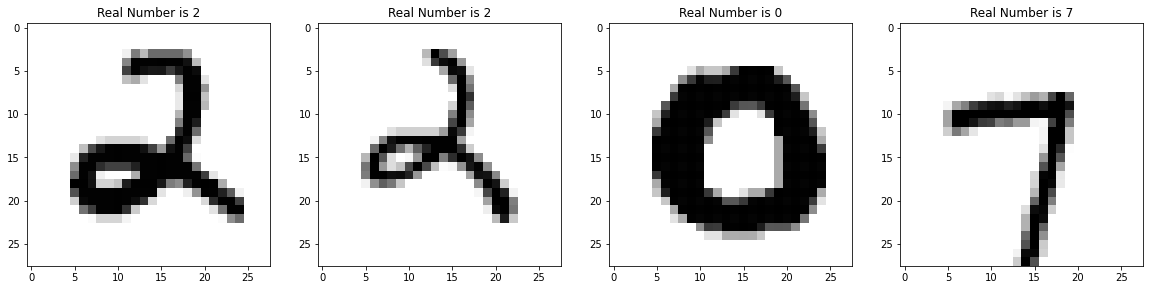

In [ ]:
X_train__ = X_train.reshape(X_train.shape[0], 28, 28)
fig, axis = plt.subplots(1, 4, figsize=(20, 10))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_train__[i], cmap='binary')
    digit = y_train[i].argmax()
    ax.set(title = f"Real Number is {digit}");

## Convolutional Neural Network (CNN)

In [ ]:
model = Sequential()   
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu", input_shape=(28,28,1)))
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu"))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(LayerNormalization())
model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(LayerNormalization())    
model.add(Conv2D(filters=256, kernel_size = (3,3), activation="relu"))
    
model.add(MaxPooling2D(pool_size=(2,2)))
    
model.add(Flatten())
model.add(LayerNormalization())
model.add(Dense(512,activation="relu"))
    
model.add(Dense(10,activation="softmax"))
    
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

### Data Augmentation

In [ ]:
# With data augmentation to prevent overfitting
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


#datagen.fit(X_train)
batch_size = 64
train_gen = datagen.flow(X_train, y_train, batch_size=batch_size)
test_gen = datagen.flow(X_test, y_test, batch_size=batch_size)

### Model Training

In [ ]:
# Fit the model
history = model.fit(train_gen, 
                    epochs = 10, 
                    steps_per_epoch = X_train.shape[0] // batch_size,
                    validation_data = test_gen,
                    validation_steps = X_test.shape[0] // batch_size 
                   )

Epoch 1/10
590/590 [==============================] - 300s 507ms/step - loss: 0.2285 - accuracy: 0.9264 - val_loss: 0.0780 - val_accuracy: 0.9764
Epoch 2/10
590/590 [==============================] - 297s 503ms/step - loss: 0.0641 - accuracy: 0.9808 - val_loss: 0.0661 - val_accuracy: 0.9781
Epoch 3/10
590/590 [==============================] - 297s 504ms/step - loss: 0.0511 - accuracy: 0.9846 - val_loss: 0.0491 - val_accuracy: 0.9834
Epoch 4/10
590/590 [==============================] - 297s 504ms/step - loss: 0.0444 - accuracy: 0.9862 - val_loss: 0.0475 - val_accuracy: 0.9846
Epoch 5/10
590/590 [==============================] - 295s 500ms/step - loss: 0.0386 - accuracy: 0.9877 - val_loss: 0.0474 - val_accuracy: 0.9858
Epoch 6/10
590/590 [==============================] - 296s 502ms/step - loss: 0.0380 - accuracy: 0.9889 - val_loss: 0.0414 - val_accuracy: 0.9863
Epoch 7/10
590/590 [==============================] - 298s 504ms/step - loss: 0.0313 - accuracy: 0.9904 - val_loss: 0.0553 -

### Plot CNN Model

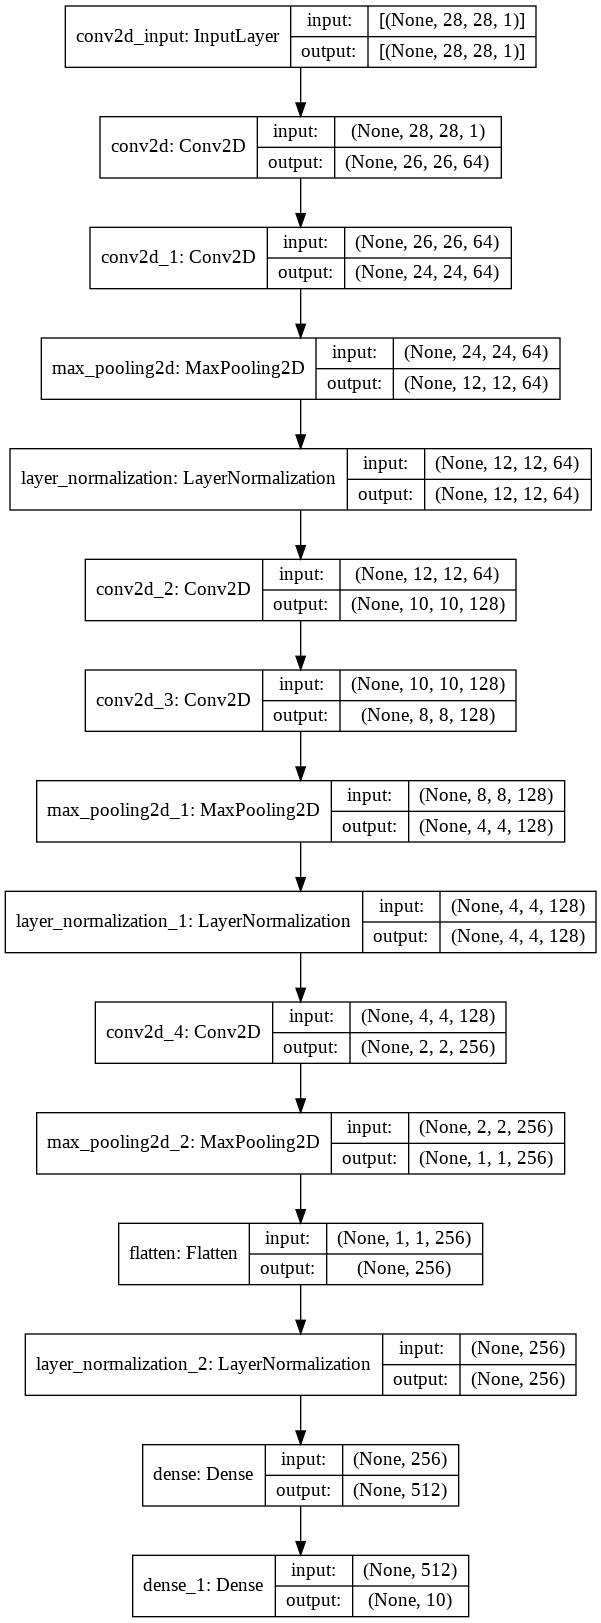

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

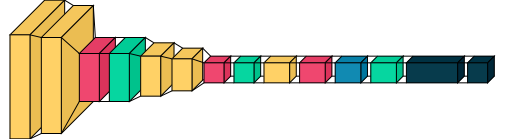

In [ ]:
import visualkeras
visualkeras.layered_view(model)

### Evaluate the model

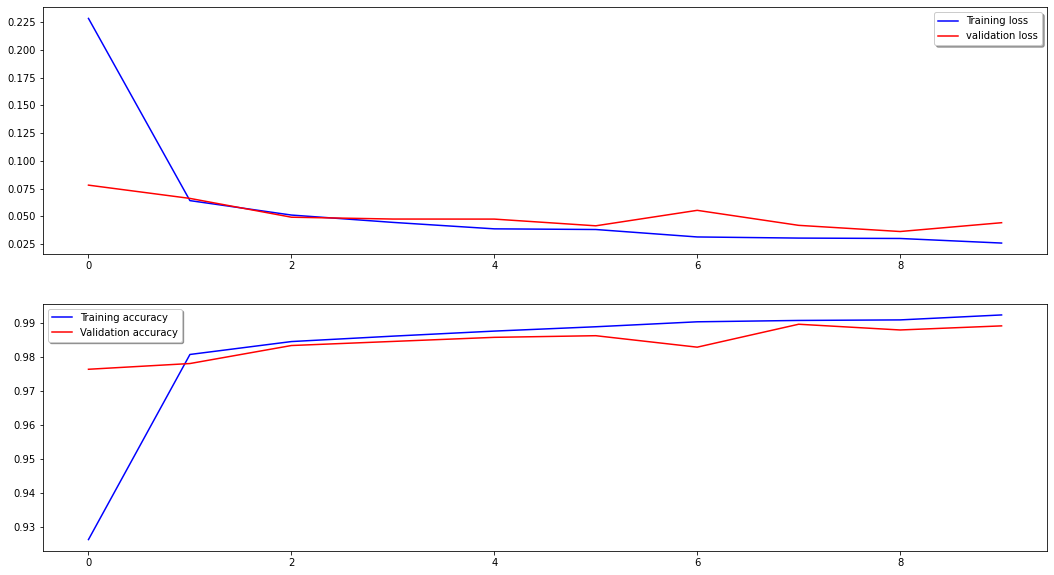

In [ ]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1, figsize=(18, 10))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

### Confusion matrix

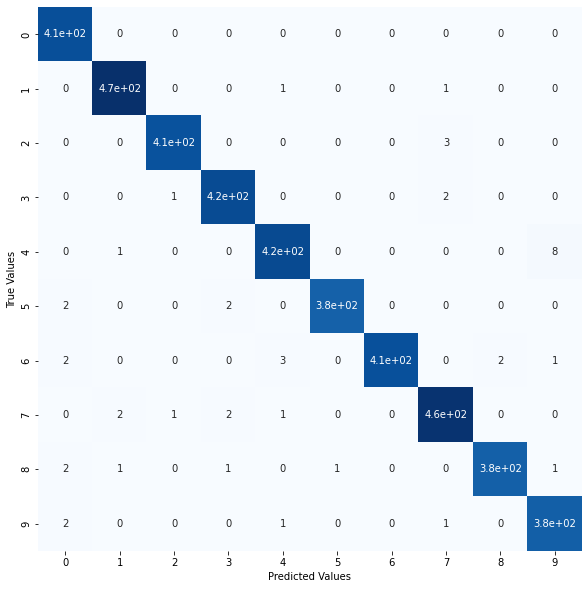

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
Y_pred = np.argmax(y_pred, 1) 
Y_test = np.argmax(y_test, 1) 
mat = confusion_matrix(Y_test, Y_pred)

# Plot Confusion matrix
fig = plt.figure(figsize=(10, 10)) 
sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

### Prediction validation results

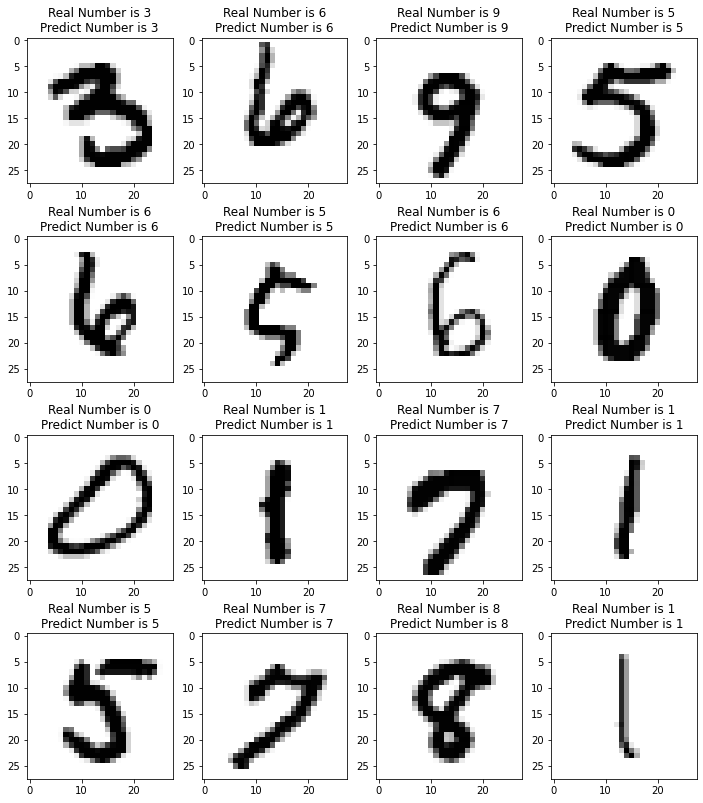

In [ ]:
y_pred = model.predict(X_test)
X_test__ = X_test.reshape(X_test.shape[0], 28, 28)

fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_test__[i], cmap='binary')
    ax.set(title = f"Real Number is {y_test[i].argmax()}\nPredict Number is {y_pred[i].argmax()}");

### Saving Model

In [ ]:
model.save('model.h5')
for file in os.listdir():
  if file.endswith('.h5'):
    print(file)

model.h5
